In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas, numpy, random
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        # define the network
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 1),
            nn.Sigmoid()
        )

        # define the loss function
        self.loss_function = nn.MSELoss()

        # define the optimiser
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # define the counter
        self.count = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        self.count += 1

        if self.count % 10 == 0:
            self.progress.append(loss.item())

            if self.count % 1000 == 0:
                print(f"counter ={self.count}, loss={loss.item()} ")

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))

In [23]:
from torch.utils.data import Dataset
from matplotlib import pyplot as plt

class MnistDataset(Dataset):
    def __init__(self, csv_file):
        self.data_df = pd.read_csv(csv_file, header=None)

    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        label = self.data_df.iloc[index, 0]
        target = torch.zeros((10))
        target[label] = 1

        image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values) / 255.0

        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index, 1:].values.reshape(28,28)
        plt.title('label = ' + str(self.data_df.iloc[index, 0]))
        plt.imshow(img, interpolation='none', cmap='Blues')

    



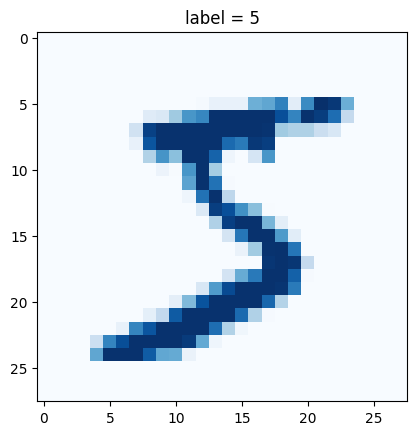

In [24]:
# 链接：https://pan.baidu.com/s/1V0WzUYvObLRU2wv8fYEwAg
# 提取码：z9bh

#mnist_dataset = MnistDataset(csv_file='../torch_mnist/mnist_train_100.csv')
mnist_dataset = MnistDataset(csv_file='../torch_mnist/mnist_train.csv')

mnist_dataset.plot_image(0)

In [12]:
def generate_random(size=4):
    return torch.rand(size)

generate_random()

tensor([0.1307, 0.6020, 0.2872, 0.3531])

In [28]:
D = Discriminator()

for label , image_data_tensor, target_tensor in mnist_dataset:
    D.train(image_data_tensor, torch.FloatTensor([1]))
    D.train(generate_random(784), torch.FloatTensor([0.0])) 

counter =1000, loss=0.019105352461338043 
counter =2000, loss=0.005215853918343782 
counter =3000, loss=0.00288801989518106 
counter =4000, loss=0.0018091631354764104 
counter =5000, loss=0.0012892265804111958 
counter =6000, loss=0.0008349432027898729 
counter =7000, loss=0.0009293791954405606 
counter =8000, loss=0.0013236516388133168 
counter =9000, loss=0.0007715539541095495 
counter =10000, loss=0.0006571629783138633 
counter =11000, loss=0.0004151145403739065 
counter =12000, loss=0.0006539541645906866 
counter =13000, loss=0.0002479988615959883 
counter =14000, loss=0.0002769475104287267 
counter =15000, loss=0.0003217144694644958 
counter =16000, loss=0.00022522018116433173 
counter =17000, loss=0.00024700892390683293 
counter =18000, loss=0.00014314311556518078 
counter =19000, loss=0.00018440955318510532 
counter =20000, loss=0.00028489503893069923 
counter =21000, loss=0.00023432759917341173 
counter =22000, loss=0.00018624267249833792 
counter =23000, loss=0.000136478105559

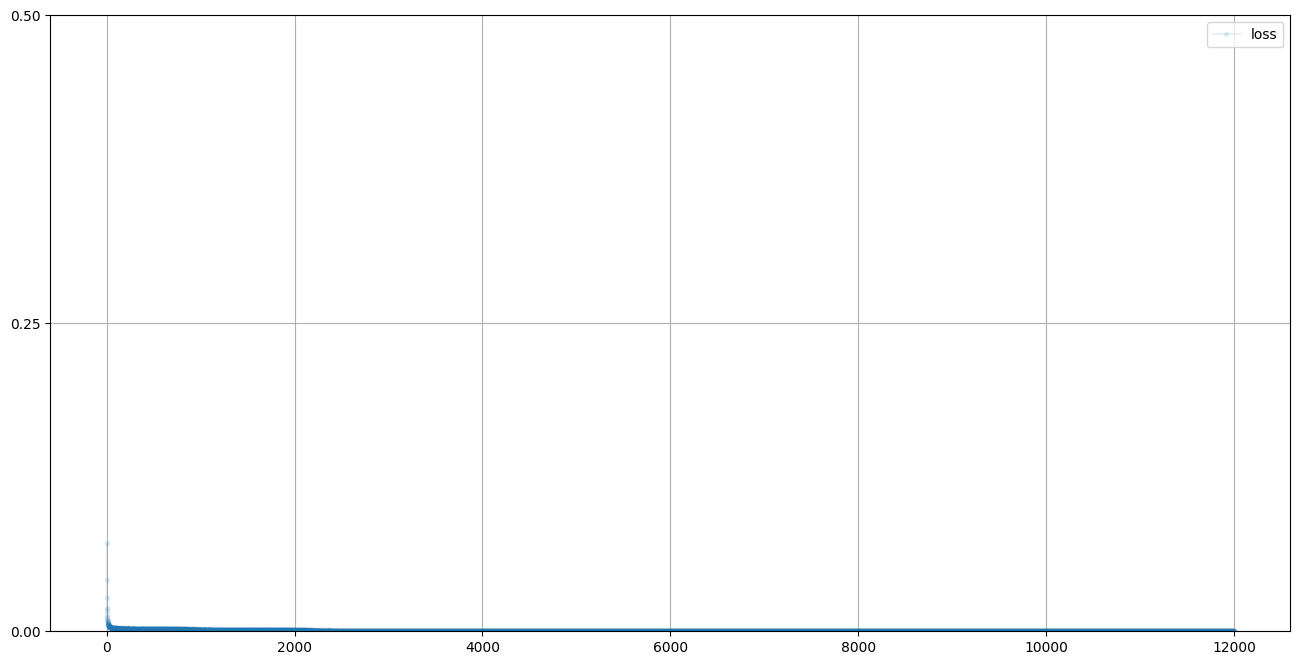

In [26]:
D.plot_progress()

In [27]:
# Test the discriminator
for i in range(10):
    print(D.forward(generate_random(784)).item())

for i in range(10):
    image_data_tensor = mnist_dataset[random.randint(0, len(mnist_dataset))][1]
    print(D.forward(image_data_tensor).item())

0.007205482106655836
0.008191291242837906
0.008422677405178547
0.008579853922128677
0.00850500725209713
0.009282846003770828
0.007580705918371677
0.009193802252411842
0.007144794799387455
0.009354617446660995
0.10336072742938995
0.10501728951931
0.1026245504617691
0.10615882277488708
0.1058899387717247
0.10883323103189468
0.09979099780321121
0.09754884988069534
0.10787033289670944
0.10435886681079865


In [29]:
class Generator(nn.Module):

    def __init__(self):
        super().__init__()

        # define the network
        self.model = nn.Sequential(
            nn.Linear(1, 200),
            nn.Sigmoid(),
            nn.Linear(200, 784),
            nn.Sigmoid()
        )

        # define the optimiser
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # define the counter
        self.count = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, D, inputs, targets):
        g_outputs = self.forward(inputs)

        d_outputs = D.forward(g_outputs)

        loss = D.loss_function(d_outputs, targets)

        self.count += 1

        if self.count % 10 == 0:
            self.progress.append(loss.item())

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.8))


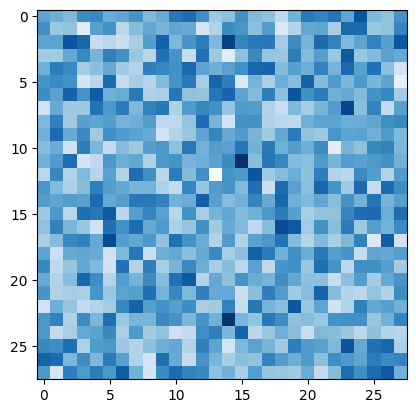

In [30]:
G = Generator()
output = G.forward(generate_random(1))
img = output.detach().numpy().reshape(28,28)
plt.imshow(img, interpolation='none', cmap='Blues')

In [31]:
D = Discriminator()
G = Generator()

for label, image_data_tensor, target_tensor in mnist_dataset:
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    D.train(G.forward(generate_random(1)), torch.FloatTensor([0.0]))
    G.train(D, generate_random(1), torch.FloatTensor([1.0]))

counter =1000, loss=0.018633486703038216 
counter =2000, loss=0.007171773351728916 
counter =3000, loss=0.005444366950541735 
counter =4000, loss=0.004817673936486244 
counter =5000, loss=0.004908872302621603 
counter =6000, loss=0.005367561709135771 
counter =7000, loss=0.008471234701573849 
counter =8000, loss=0.01153184100985527 
counter =9000, loss=0.031443044543266296 
counter =10000, loss=0.03143708407878876 
counter =11000, loss=0.06465769559144974 
counter =12000, loss=0.12619996070861816 
counter =13000, loss=0.1102953776717186 
counter =14000, loss=0.14733542501926422 
counter =15000, loss=0.12899406254291534 
counter =16000, loss=0.18510232865810394 
counter =17000, loss=0.17124861478805542 
counter =18000, loss=0.16471073031425476 
counter =19000, loss=0.24310007691383362 
counter =20000, loss=0.17975762486457825 
counter =21000, loss=0.17593519389629364 
counter =22000, loss=0.2057226151227951 
counter =23000, loss=0.21312488615512848 
counter =24000, loss=0.28934100270271

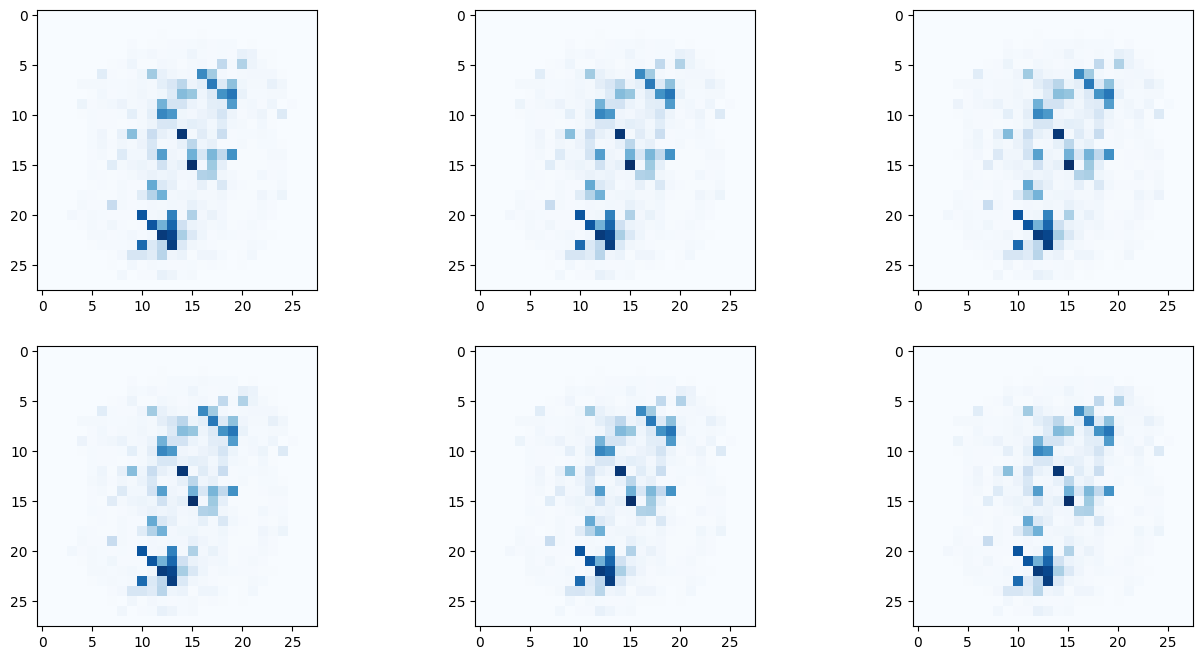

In [32]:
f, axarr = plt.subplots(2, 3, figsize=(16, 8))
for i in range(2):
    for j in range(3):
        axarr[i, j].imshow(G.forward(generate_random(1)).detach().numpy().reshape(28, 28), cmap='Blues')